# Movie Genre Prediction

Steps to be followed:

1. Data Acquisition
2. Data Preprocessing
3. Text preprocessing
4. Label Encoding
5. Feature Extraction
6. Model Training
7. Testing models


In [ ]:
from google.colab import files
files.upload()
!mkdir ~/.kaggle
!cd kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
/bin/bash: line 1: cd: too many arguments
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d hijest/genre-classification-dataset-imdb

Dataset URL: https://www.kaggle.com/datasets/hijest/genre-classification-dataset-imdb
License(s): other
 96% 40.0M/41.7M [00:00<00:00, 93.3MB/s]
100% 41.7M/41.7M [00:00<00:00, 81.3MB/s]


In [ ]:
!unzip genre-classification-dataset-imdb.zip

Archive:  genre-classification-dataset-imdb.zip
  inflating: Genre Classification Dataset/description.txt  
  inflating: Genre Classification Dataset/test_data.txt  
  inflating: Genre Classification Dataset/test_data_solution.txt  
  inflating: Genre Classification Dataset/train_data.txt  


#### Data Acquisition:

Data is directly taken from kaggle platform using api token.

Then a dataframe is created using pandas library

In [ ]:
import pandas as pd
data_path="/content/Genre Classification Dataset/train_data.txt"
data=pd.read_csv(data_path,delimiter=":::",engine="python",names=['id','title','Genre','Description'])

In [ ]:
data.head()

,id,title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


#### Data Preprocessing

1. Removing unwanted data/features
2. Clear understanding of features and label data
3. Checking for Null values if any then remove
4. Check whether the data is balanced or not


In [ ]:
data.shape

(54214, 4)

In [ ]:
data.describe()

,id
count,54214.000000
mean,27107.500000
std,15650.378084
min,1.000000
25%,13554.250000
50%,27107.500000
75%,40660.750000
max,54214.000000


In [ ]:
# I don't need anymore this id column
data=data.drop('id',axis=1)
data['Description']=data['Description']+data['title']
data.drop('title',axis=1,inplace=True)
data

,Genre,Description
0,drama,Listening in to a conversation between his do...
1,thriller,A brother and sister with a past incestuous r...
2,adult,As the bus empties the students for their fie...
3,drama,To help their unemployed father make ends mee...
4,drama,The film's title refers not only to the un-re...
...,...,...
54209,comedy,This short-lived NBC live sitcom centered on ...
54210,horror,The NEXT Generation of EXPLOITATION. The sist...
54211,documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54212,comedy,Walter and Vivian live in the country and hav...


In [ ]:
# Having many samples will give the best accuracy but at the same time it will consume more time to train
data=data.head(10000)
data.columns

Index(['Genre', 'Description'], dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Genre        10000 non-null  object
 1   Description  10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [ ]:
# label data is genre
data['Genre']

0             drama 
1          thriller 
2             adult 
3             drama 
4             drama 
            ...     
9995     reality-tv 
9996      animation 
9997          drama 
9998        western 
9999      adventure 
Name: Genre, Length: 10000, dtype: object

In [ ]:
data['Genre'].value_counts()

Genre
 drama           2466
 documentary     2410
 comedy          1373
 short            947
 horror           396
 thriller         326
 action           245
 western          202
 reality-tv       165
 family           148
 music            137
 adventure        137
 sci-fi           118
 romance          118
 adult            117
 animation         91
 sport             84
 crime             78
 talk-show         77
 fantasy           67
 mystery           58
 musical           54
 biography         49
 history           45
 game-show         38
 news              32
 war               22
Name: count, dtype: int64

In [ ]:
print(len(data['Genre'].unique()))
data['Genre'].unique()


27


array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], dtype=object)

# Movie Genre Classification

## Features:
We have only 2 features
1. Movie title
2. Movie Description

By using above two features we need to classify the movie's genre

The above two features are text data so we need to convert that data into vectors using techniques such as Bag of words, tfidf vectorizer and word2vec methods

If I use BOW or Tfidf then I will get a sparse matrix of data  

With the help of that data I am going to classify the Genre of the data.

This is a multiclass problem


#### Text Preprocessing

Before extracting features from text we need to preprocess the text which is free of empty spaces, special characters, stop words, lemmitized and stemming data

Using some NLP techniques we preprocessed text data:  

Lemmitization
Stemming

In [ ]:
# applying text preprocessing
import re
def cleantext(sentence):
  sentence=re.sub('\s+'," ",sentence)
  sentence=re.sub("[^a-zA-Z0-9\s]","",sentence)
  return sentence

data['Description']=data['Description'].apply(cleantext)
data

<ipython-input-14-9a1bc7fc14b9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Description']=data['Description'].apply(cleantext)


,Genre,Description
0,drama,Listening in to a conversation between his do...
1,thriller,A brother and sister with a past incestuous r...
2,adult,As the bus empties the students for their fie...
3,drama,To help their unemployed father make ends mee...
4,drama,The films title refers not only to the unreco...
...,...,...
9995,reality-tv,The show began with Jared and Kristen in 2007...
9996,animation,The center characters of the film are two kid...
9997,drama,Ashland is the story of Ash Slavin a lonely a...
9998,western,Railroad foreman Murray Sinclair is dismissed...


In [ ]:
# applying removing stopwords , lemmitization and stemming techniques

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import spacy
import pandas as pd

# Download NLTK data files (run only once)
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize SpaCy
nlp = spacy.load('en_core_web_sm')

class TextPreprocessing:
    def __init__(self):
        self.alphabets=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
        self.stop_words = [set(stopwords.words('english'))]+self.alphabets
        self.lemmatizer = WordNetLemmatizer()
        self.stemmer = PorterStemmer()

    def remove_stopwords(self, text):
        words = text.split()
        filtered_words = [word for word in words if word.lower() not in self.stop_words]
        return ' '.join(filtered_words)

    def lemmatize(self, text):
        words = text.split()
        lemmatized_words = [self.lemmatizer.lemmatize(word) for word in words]
        return ' '.join(lemmatized_words)

    def stem(self, text):
        words = text.split()
        stemmed_words = [self.stemmer.stem(word) for word in words]
        return ' '.join(stemmed_words)

    def preprocess(self, text):
        text = self.remove_stopwords(text)
        text = self.lemmatize(text)
        text = self.stem(text)
        return text

preprocessor = TextPreprocessing()

# Apply preprocessing to the 'text' column
data['Description'] = data['Description'].apply(preprocessor.preprocess)
data


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
<ipython-input-15-64f1cb1fd80e>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Description'] = data['Description'].apply(preprocessor.preprocess)


,Genre,Description
0,drama,listen in to convers between hi doctor and par...
1,thriller,brother and sister with past incestu relations...
2,adult,as the bu empti the student for their field tr...
3,drama,to help their unemploy father make end meet ed...
4,drama,the film titl refer not onli to the unrecov bo...
...,...,...
9995,reality-tv,the show began with jare and kristen in 2007 k...
9996,animation,the center charact of the film are two kidsa b...
9997,drama,ashland is the stori of ash slavin lone and de...
9998,western,railroad foreman murray sinclair is dismiss by...


In [ ]:
# need to find unique words in the dataset
feature_words=[]
for sentence in data['Description']:
  for word in sentence.split():
    if(len(word)>1):
      feature_words.append(word)

print("Number of distinct words ",len(feature_words))
feature_words

Number of distinct words  1025917


['listen',
 'in',
 'to',
 'convers',
 'between',
 'hi',
 'doctor',
 'and',
 'parent',
 '10yearold',
 'oscar',
 'learn',
 'what',
 'nobodi',
 'ha',
 'the',
 'courag',
 'to',
 'tell',
 'him',
 'he',
 'onli',
 'ha',
 'few',
 'week',
 'to',
 'live',
 'furiou',
 'he',
 'refus',
 'to',
 'speak',
 'to',
 'anyon',
 'except',
 'straighttalk',
 'rose',
 'the',
 'ladi',
 'in',
 'pink',
 'he',
 'meet',
 'on',
 'the',
 'hospit',
 'stair',
 'as',
 'christma',
 'approach',
 'rose',
 'us',
 'her',
 'fantast',
 'experi',
 'profession',
 'wrestler',
 'her',
 'imagin',
 'wit',
 'and',
 'charm',
 'to',
 'allow',
 'oscar',
 'to',
 'live',
 'life',
 'and',
 'love',
 'to',
 'the',
 'full',
 'in',
 'the',
 'compani',
 'of',
 'hi',
 'friend',
 'pop',
 'corn',
 'einstein',
 'bacon',
 'and',
 'childhood',
 'sweetheart',
 'peggi',
 'blue',
 'oscar',
 'et',
 'la',
 'dame',
 'rose',
 '2009',
 'brother',
 'and',
 'sister',
 'with',
 'past',
 'incestu',
 'relationship',
 'have',
 'current',
 'murder',
 'relationship'

#### Label Encoding
Label data should be encoded with ordinal values will be useful to understand the data.

In [ ]:
# label encoding

def get_labels(values):
  i=0
  dict1={}
  for value in values:
    dict1[i]=value
    i+=1
  return dict1

labels=get_labels(data['Genre'].unique())
labels


{0: ' drama ',
 1: ' thriller ',
 2: ' adult ',
 3: ' documentary ',
 4: ' comedy ',
 5: ' crime ',
 6: ' reality-tv ',
 7: ' horror ',
 8: ' sport ',
 9: ' animation ',
 10: ' action ',
 11: ' fantasy ',
 12: ' short ',
 13: ' sci-fi ',
 14: ' music ',
 15: ' adventure ',
 16: ' talk-show ',
 17: ' western ',
 18: ' family ',
 19: ' mystery ',
 20: ' history ',
 21: ' news ',
 22: ' biography ',
 23: ' romance ',
 24: ' game-show ',
 25: ' musical ',
 26: ' war '}

In [ ]:
def label_encoding(label):
  labels=get_labels(data['Genre'].unique())
  for key,value in labels.items():
    if value==label:
      return key
  return None

data['label']=data['Genre'].apply(label_encoding)
data.drop('Genre',axis=1,inplace=True)


<ipython-input-18-93f2d837100c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label']=data['Genre'].apply(label_encoding)
<ipython-input-18-93f2d837100c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('Genre',axis=1,inplace=True)


In [ ]:
data

,Description,label
0,listen in to convers between hi doctor and par...,0
1,brother and sister with past incestu relations...,1
2,as the bu empti the student for their field tr...,2
3,to help their unemploy father make end meet ed...,0
4,the film titl refer not onli to the unrecov bo...,0
...,...,...
9995,the show began with jare and kristen in 2007 k...,6
9996,the center charact of the film are two kidsa b...,9
9997,ashland is the stori of ash slavin lone and de...,0
9998,railroad foreman murray sinclair is dismiss by...,17


#### Feature Extraction

For feature extraction I have used tfidf vectorizer technique which converts our text into d dimensional sparse matrix.

With respect memory, I have considered top 10000 features from 10 lakh features.

#### Model Training

After successful extraction of features data should be trained using some machine learning models

My preference to train the data:

1. Naive Bayes --> Start with Naive bayes which is the best model for text classification (use smooth value for zero probabilities)
2. Decision Tree Classifier --> Decision tree is the best model in machine learning which works on nested if-else conditions.
3. Use some ensembles like bagging and boosting. In bagging use Random forest model which trains number of decision trees and aggregates the predictions of each decision tree.
4. Majorly we have two boosting techniques which are Gradient Descent Decision Tree (GBDT) and AdaBoost


Accuracy: 0.426
Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.89      0.51       474
           1       0.00      0.00      0.00        67
           2       0.00      0.00      0.00        19
           3       0.53      0.85      0.65       493
           4       0.59      0.04      0.08       293
           5       0.00      0.00      0.00        21
           6       0.00      0.00      0.00        42
           7       0.00      0.00      0.00        79
           8       0.00      0.00      0.00        15
           9       0.00      0.00      0.00        12
          10       0.00      0.00      0.00        53
          11       0.00      0.00      0.00        14
          12       0.00      0.00      0.00       178
          13       0.00      0.00      0.00        27
          14       0.00      0.00      0.00        22
          15       0.00      0.00      0.00        26
          16       0.00      0.00      0.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

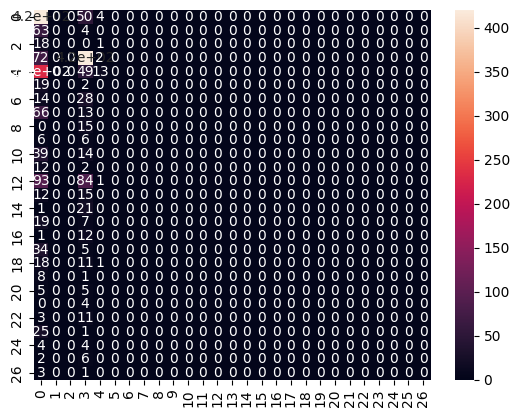

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

vectorizer = TfidfVectorizer(max_features=10000)

# Transform the documents into feature vectors
X = vectorizer.fit_transform(data['Description'])
y=data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
import seaborn as sns
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

Observe the confusion matrix that most of the predicted values are wrongly predicted as 'drama' and 'documentary' films

Accuracy: 0.426
Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.89      0.51       474
           1       0.00      0.00      0.00        67
           2       0.00      0.00      0.00        19
           3       0.53      0.85      0.65       493
           4       0.59      0.04      0.08       293
           5       0.00      0.00      0.00        21
           6       0.00      0.00      0.00        42
           7       0.00      0.00      0.00        79
           8       0.00      0.00      0.00        15
           9       0.00      0.00      0.00        12
          10       0.00      0.00      0.00        53
          11       0.00      0.00      0.00        14
          12       0.00      0.00      0.00       178
          13       0.00      0.00      0.00        27
          14       0.00      0.00      0.00        22
          15       0.00      0.00      0.00        26
          16       0.00      0.00      0.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

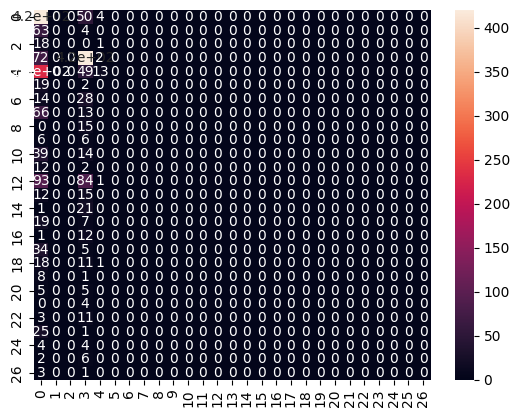

In [ ]:
# Initialize and train the Naive Bayes model with Laplace smoothing (alpha=1)
model = MultinomialNB(alpha=1.0)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)



In [ ]:
# trying for various alpha values
alphas=[0.00001,0.0001,0.001,0.01,0.1,1.0,10]

for alpha in alphas:
  model = MultinomialNB(alpha=1.0)
  model.fit(X_train, y_train)

# Make predictions on the test set
  y_pred = model.predict(X_test)

# Evaluate the model
  accuracy = accuracy_score(y_test, y_pred)
  print(f'Accuracy: {accuracy}')


Accuracy: 0.426
Accuracy: 0.426
Accuracy: 0.426
Accuracy: 0.426
Accuracy: 0.426
Accuracy: 0.426
Accuracy: 0.426


Accuracy: 0.3105
Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.42      0.38       474
           1       0.08      0.07      0.08        67
           2       0.00      0.00      0.00        19
           3       0.53      0.56      0.55       493
           4       0.29      0.24      0.26       293
           5       0.00      0.00      0.00        21
           6       0.04      0.02      0.03        42
           7       0.12      0.11      0.12        79
           8       0.15      0.13      0.14        15
           9       0.00      0.00      0.00        12
          10       0.05      0.04      0.04        53
          11       0.00      0.00      0.00        14
          12       0.17      0.19      0.18       178
          13       0.13      0.07      0.10        27
          14       0.07      0.09      0.08        22
          15       0.18      0.19      0.19        26
          16       0.00      0.00      0.

<Axes: >

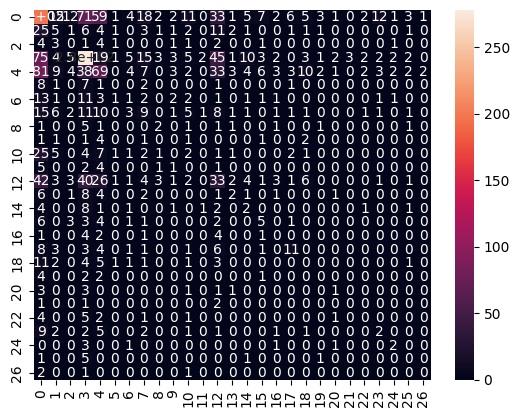

In [ ]:
# let's look on decision tree classifier

from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)



In [ ]:
# Checking decision tree model with various depth values

depths=[3,4,5,6,7,8,9,10,20,30,40,50]

for depth in depths:
  model=DecisionTreeClassifier(max_depth=depth,random_state=42)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)

  print(f"Accuracy when depth is {depth} is {accuracy_score(y_test,y_pred)}")


Accuracy when depth is 3 is 0.344
Accuracy when depth is 4 is 0.38
Accuracy when depth is 5 is 0.382
Accuracy when depth is 6 is 0.3815
Accuracy when depth is 7 is 0.3875
Accuracy when depth is 8 is 0.3815
Accuracy when depth is 9 is 0.382
Accuracy when depth is 10 is 0.383
Accuracy when depth is 20 is 0.3525
Accuracy when depth is 30 is 0.336
Accuracy when depth is 40 is 0.3195
Accuracy when depth is 50 is 0.311


Accuracy: 0.44
Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.85      0.52       474
           1       0.00      0.00      0.00        67
           2       0.00      0.00      0.00        19
           3       0.51      0.86      0.64       493
           4       0.53      0.14      0.23       293
           5       0.00      0.00      0.00        21
           6       0.00      0.00      0.00        42
           7       1.00      0.01      0.02        79
           8       1.00      0.07      0.12        15
           9       0.00      0.00      0.00        12
          10       0.50      0.02      0.04        53
          11       0.00      0.00      0.00        14
          12       1.00      0.01      0.02       178
          13       0.00      0.00      0.00        27
          14       0.00      0.00      0.00        22
          15       0.00      0.00      0.00        26
          16       0.00      0.00      0.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

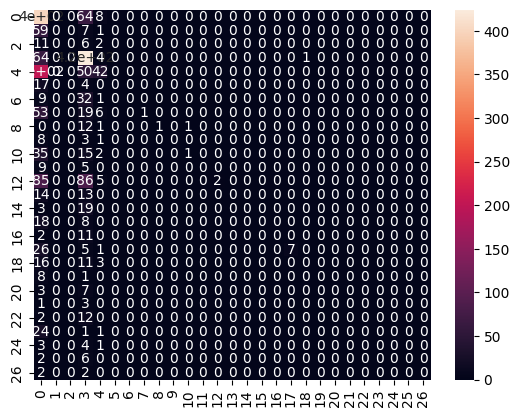

In [ ]:
# Again we failed in using decision tree model now let's focus on some ensembles bagging and boosting are preferred

# bagging --> Random Forest = K*(DecisionTree+row_sampling+col sampling)

from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)



Practically Random forest doesn't improve significant performance because it is applied when data is having high variance and this model reduces variance significantly without impacting the bias
<br>
But the data is getting underfit while training which is having high bias, to reduce this high bias without affecting variance we use boosting techniques which reduces bias and collection of models will be trained this time where each model tries to correct the errors did in previous models.

Accuracy: 0.4295
Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.66      0.51       474
           1       0.24      0.12      0.16        67
           2       0.26      0.26      0.26        19
           3       0.57      0.73      0.64       493
           4       0.53      0.29      0.38       293
           5       0.00      0.00      0.00        21
           6       0.13      0.10      0.11        42
           7       0.67      0.33      0.44        79
           8       0.21      0.20      0.21        15
           9       0.00      0.00      0.00        12
          10       0.19      0.11      0.14        53
          11       0.00      0.00      0.00        14
          12       0.37      0.09      0.14       178
          13       0.19      0.19      0.19        27
          14       0.36      0.18      0.24        22
          15       0.10      0.12      0.11        26
          16       0.07      0.08      0.

<Axes: >

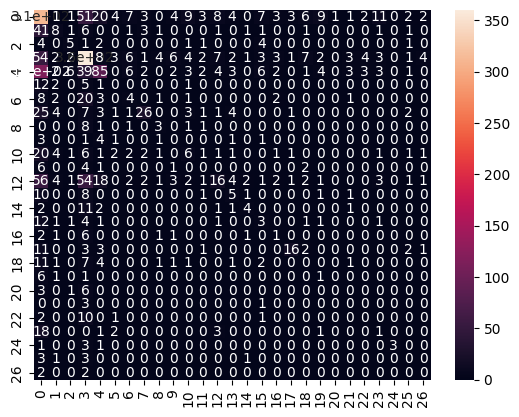

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the GBDT classifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.3355
Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.95      0.43       474
           1       0.00      0.00      0.00        67
           2       0.00      0.00      0.00        19
           3       0.60      0.41      0.49       493
           4       0.29      0.03      0.06       293
           5       0.00      0.00      0.00        21
           6       0.00      0.00      0.00        42
           7       0.00      0.00      0.00        79
           8       0.00      0.00      0.00        15
           9       0.00      0.00      0.00        12
          10       0.00      0.00      0.00        53
          11       0.00      0.00      0.00        14
          12       0.00      0.00      0.00       178
          13       0.00      0.00      0.00        27
          14       0.00      0.00      0.00        22
          15       0.46      0.23      0.31        26
          16       0.00      0.00      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

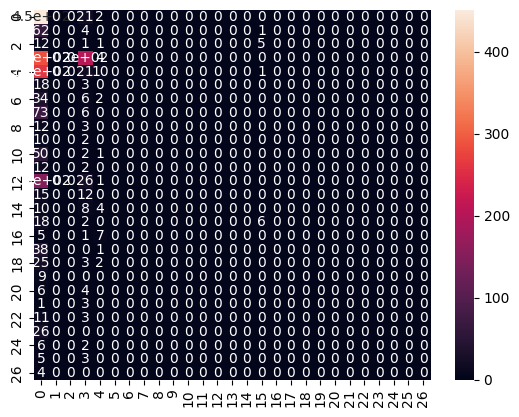

In [ ]:
# adaboost model

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the AdaBoost classifier
base_estimator = DecisionTreeClassifier(max_depth=1)  # Using decision trees with depth=1 as base estimator
model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)


Accuracy: 0.439
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.67      0.54       487
           1       0.10      0.06      0.07        53
           2       0.29      0.20      0.24        25
           3       0.58      0.73      0.65       480
           4       0.49      0.30      0.37       276
           5       0.05      0.07      0.06        15
           6       0.11      0.15      0.13        27
           7       0.56      0.42      0.48        72
           8       0.09      0.05      0.06        22
           9       0.00      0.00      0.00        14
          10       0.16      0.09      0.12        53
          11       0.11      0.05      0.06        22
          12       0.46      0.12      0.19       189
          13       0.17      0.15      0.16        27
          14       0.21      0.13      0.16        31
          15       0.29      0.23      0.26        30
          16       0.14      0.12      0.1

<Axes: >

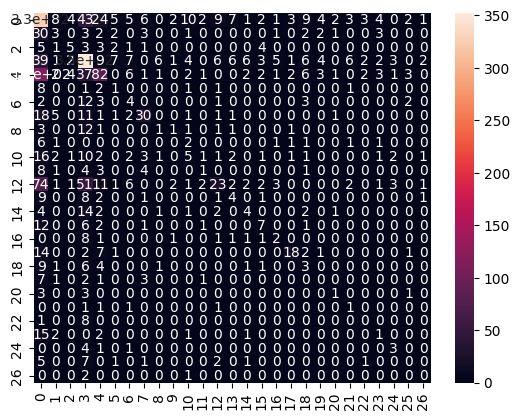

In [ ]:
# pipeline (TfidfVectorizer + Gradient Boosting Decision Tree)

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline

# Define the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=10000)),  # Step 1: TfidfVectorizer
    ('gbdt', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))  # Step 2: GBDT
])

X_train,X_test,y_train,y_test=train_test_split(data['Description'],data['label'],test_size=0.2,random_state=0)
# Train the model using the pipeline
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)



Accuracy: 0.3345
Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.96      0.43       474
           1       0.00      0.00      0.00        67
           2       0.00      0.00      0.00        19
           3       0.65      0.40      0.49       493
           4       0.30      0.04      0.07       293
           5       0.00      0.00      0.00        21
           6       0.00      0.00      0.00        42
           7       0.00      0.00      0.00        79
           8       0.00      0.00      0.00        15
           9       0.00      0.00      0.00        12
          10       0.00      0.00      0.00        53
          11       0.00      0.00      0.00        14
          12       0.00      0.00      0.00       178
          13       0.00      0.00      0.00        27
          14       0.00      0.00      0.00        22
          15       0.43      0.23      0.30        26
          16       0.00      0.00      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

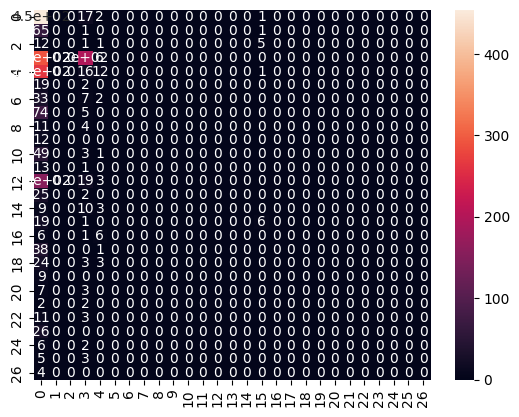

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

# Define the pipeline
pipeline_adaboost = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=10000)),  # Step 1: TfidfVectorizer
    ('adaboost', AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                                    n_estimators=100, learning_rate=0.1, random_state=42))  # Step 2: AdaBoost
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Description'], data['label'], test_size=0.2, random_state=42)

# Train the model using the pipeline
pipeline_adaboost.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline_adaboost.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)


In [ ]:
# We are not able to solve this problem with machine learning techniques. I think this data needs to be trained using Deep learning algorithms.